<a href="https://colab.research.google.com/github/xanasa14/Crypto/blob/main/Bitcoin_predictor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Sentiment Analisys 

In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
tickers = ['COIN']
news_tables = {}

for ticker in tickers:
  url = finwiz_url + ticker
  req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
  response = urlopen(req)    
  # Read the contents of the file into 'html'
  html = BeautifulSoup(response)
  # Find 'news-table' in the Soup and load it into 'news_table'
  news_table = html.find(id='news-table')
  # Add the table to our dictionary
  news_tables[ticker] = news_table


In [3]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['COIN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Tesla Slides
Jun-16-21 12:36PM  
Is Coinbase Stock A Buy Right Now As Bitcoin Surges Above $41,000?
12:35PM  
Coinbase Pro Adds Polkadot Listing To Its Lineup
07:42AM  
Coinbase Gets Canaccord Boost, Seen as Ramp to Crypto
07:09AM  


In [4]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['COIN',
  'Jun-16-21',
  '12:36PM',
  "ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Tesla Slides"],
 ['COIN',
  'Jun-16-21',
  '12:35PM',
  'Is Coinbase Stock A Buy Right Now As Bitcoin Surges Above $41,000?'],
 ['COIN',
  'Jun-16-21',
  '07:42AM',
  'Coinbase Pro Adds Polkadot Listing To Its Lineup'],
 ['COIN',
  'Jun-16-21',
  '07:09AM',
  'Coinbase Gets Canaccord Boost, Seen as Ramp to Crypto'],
 ['COIN',
  'Jun-15-21',
  '06:05PM',
  'Free Cryptocurrency Promos Going on Right Now'],
 ['COIN', 'Jun-15-21', '05:57PM', 'Benzinga Shorts: Buying Dogecoin'],
 ['COIN', 'Jun-15-21', '05:45PM', 'Benzinga Shorts: How to Buy Bitcoin'],
 ['COIN',
  'Jun-15-21',
  '02:50PM',
  "Matt James' advice to Chris Harrison: Buy Bitcoin"],
 ['COIN',
  'Jun-15-21',
  '01:52PM',
  'FTXs Sam Bankman-Fried on Going Public, SPACs and a Bitcoin ETF'],
 ['COIN',
  'Jun-15-21',
  '08:30AM',
  'Coinbase Partners with 401(k) Advisor; Shares Climb 6.8%'],
 ['COIN', 'Jun-15-21', '0

In [5]:
import nltk
nltk.download('vader_lexicon')

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(30)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,ticker,date,time,headline,neg,neu,pos,compound
0,COIN,2021-06-16,12:36PM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,0.000,1.000,0.000,0.0000
1,COIN,2021-06-16,12:35PM,Is Coinbase Stock A Buy Right Now As Bitcoin S...,0.000,1.000,0.000,0.0000
2,COIN,2021-06-16,07:42AM,Coinbase Pro Adds Polkadot Listing To Its Lineup,0.000,1.000,0.000,0.0000
3,COIN,2021-06-16,07:09AM,"Coinbase Gets Canaccord Boost, Seen as Ramp to...",0.000,0.748,0.252,0.4019
4,COIN,2021-06-15,06:05PM,Free Cryptocurrency Promos Going on Right Now,0.000,0.645,0.355,0.5106
5,COIN,2021-06-15,05:57PM,Benzinga Shorts: Buying Dogecoin,0.000,1.000,0.000,0.0000
6,COIN,2021-06-15,05:45PM,Benzinga Shorts: How to Buy Bitcoin,0.000,1.000,0.000,0.0000
7,COIN,2021-06-15,02:50PM,Matt James' advice to Chris Harrison: Buy Bitcoin,0.000,1.000,0.000,0.0000
8,COIN,2021-06-15,01:52PM,"FTXs Sam Bankman-Fried on Going Public, SPACs ...",0.000,1.000,0.000,0.0000
9,COIN,2021-06-15,08:30AM,Coinbase Partners with 401(k) Advisor; Shares ...,0.000,0.761,0.239,0.2960


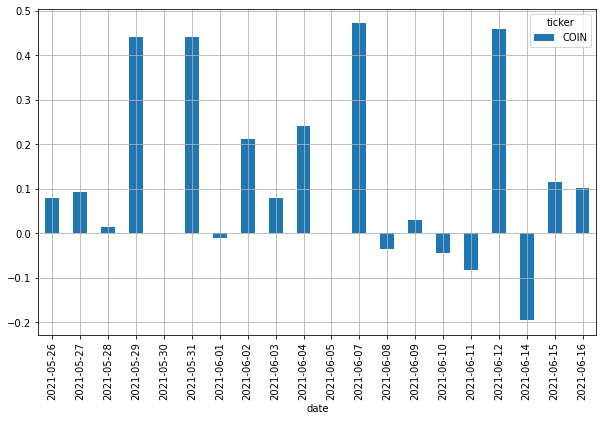

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

We should expect an increment of BitCoin's price in the following 2 days. As of right now, its price is 40,202.80 United States Dollar. 6/14/21 4:11

In [7]:
sentence = '''U.S. stocks dropped on Wednesday after the Federal Reserve raised its inflation expectations and moved up the time frame on when it will hike interest rates next.

The Dow Jones Industrial Average closed the day 264.47 points lower, or 0.8%, to 34,034.86. The blue-chip average turned sharply lower after the Fed’s statement, falling as much as 382 points. The S&P 500 dipped 0.5% to 4,223.76. The broad equity benchmark dropped as much as 1% in volatile trading as all 11 sectors fell into the red at one point. The tech-heavy Nasdaq Composite dipped 0.2% to 14,039.68 after falling 1.2% at its session low.

The policymaking Federal Open Market Committee indicated that rate hikes could come as soon as 2023, after signaling in March that it saw no increases until at least 2024.

“This is not what the market expected,” said James McCann, Aberdeen Standard Investments’ deputy chief economist. “The Fed is now signaling that rates will need to rise sooner and faster ... This change in stance jars a little with the Fed’s recent claims that the recent spike in inflation is temporary.”

Major equity benchmark traded off their lows of the day after Chairman Jerome Powell said in a press conference that the so-called dot-plot projections should be taken with a “big grain of salt” and that the liftoff is “well into the future.”

The central bank gave no indication as to when it will begin cutting back on its aggressive bond-buying program. The Fed has been buying $120 billion worth of bonds each month as the economy continues to recover from the coronavirus pandemic.

The Fed chief said that the central bank with provide “advanced notice” before announcing their move to taper asset purchases.

“You can think of this meeting that we had as the ‘talking about talking about’ meeting,” Powell said. “In coming meetings, the committee will continue to assess the economy’s progress toward our goals. As we have said, we will provide advance notice before announcing any decision to make changes to our purchases.”

The Fed also raised its headline inflation expectation to 3.4% for 2021, a full percentage point higher than the March projection, but the post-meeting statement continued to say that inflation pressures are “transitory.”

The meeting came as inflation heats up, with producer prices rising at their fastest annual rate in nearly 11 years during May, a report on Tuesday showed.

Powell said inflation could run hotter than the Fed expected amid the economic recovery.

“As the reopening continues, shifts in demand can be large and rapid and bottlenecks, hiring difficulties and other constraints could continue to limit how quickly supply can adjust, raising the possibility that inflation could turn out to be higher and more persistent than we expect,” Powell said during the press conference.

Economic reopening plays provided the broader market with some support. Royal Caribbean and Carnival both climbed 2% after an upgrade from Wolfe Research.

On Wednesday, China said it will release industrial metals including copper, aluminum and zinc from its national reserves to curb commodity prices. Copper price has fallen more than 10% from its record high, dipping into correction territory on Tuesday.
'''
sentiment_dict = vader.polarity_scores(sentence)


In [8]:
sentiment_dict

{'compound': -0.7964, 'neg': 0.047, 'neu': 0.93, 'pos': 0.023}